
# (CIFAR-10) USING CNNs



- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html




```

```

# STEP #1: IMPORT LIBRARIES/DATASETS

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


170498071/170498071 [==============================] - 294s 2us/step


In [6]:
print(x_train.shape)


(50000, 32, 32, 3)


In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

In [11]:
import matplotlib.pyplot as plt
import numpy as np


In [12]:
class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']


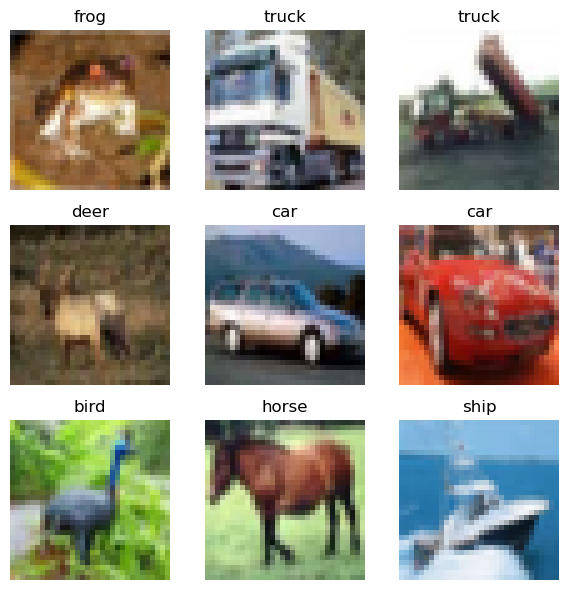

In [13]:
def plot_images(images, labels, nrows, ncols):
    """Plot a grid of images with their labels."""
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2))
    axes = axes.flatten()
    for img, ax, label in zip(images, axes, labels):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(class_names[label[0]])
    plt.tight_layout()
    plt.show()

# Select a subset of images
num_rows, num_cols = 3, 3 # for 9 images
subset_images = x_train[:num_rows*num_cols]
subset_labels = y_train[:num_rows*num_cols]

# Call the function with the subset
plot_images(subset_images, subset_labels, num_rows, num_cols)


# STEP #3: DATA PREPARATION

In [14]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [15]:
x_train, x_test = x_train / 255.0, x_test / 255.0


In [16]:
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train_one_hot, y_val_one_hot = train_test_split(
    x_train, y_train_one_hot, test_size=0.2, random_state=42)


In [20]:
from tensorflow.keras.utils import to_categorical

# CIFAR-10 has 10 classes
number_cat = 10

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, number_cat)
y_test_one_hot = to_categorical(y_test, number_cat)


In [22]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [23]:
y_train

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0.

In [24]:
y_test = keras.utils.to_categorical(y_test, number_cat)

# STEP #4: TRAIN THE MODEL

In [34]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Step 1: Reload the dataset to reset x_train and y_train
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Ensure number_cat is defined as 10 for CIFAR-10
number_cat = 10

# Step 2: Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, number_cat)
y_test_one_hot = to_categorical(y_test, number_cat)

# Step 3: Split the data correctly
x_train, x_val, y_train_one_hot, y_val_one_hot = train_test_split(
    x_train, y_train_one_hot, test_size=0.2, random_state=42)


In [35]:
history = model.fit(x_train, y_train_one_hot, epochs=20, validation_data=(x_val, y_val_one_hot))


Epoch 1/20
1250/1250 [==============================] - 16s 12ms/step - loss: 1.6615 - accuracy: 0.4053 - val_loss: 1.4459 - val_accuracy: 0.5024
Epoch 2/20
1250/1250 [==============================] - 17s 13ms/step - loss: 1.2952 - accuracy: 0.5413 - val_loss: 1.3695 - val_accuracy: 0.5256
Epoch 3/20
1250/1250 [==============================] - 17s 14ms/step - loss: 1.1250 - accuracy: 0.6052 - val_loss: 1.3846 - val_accuracy: 0.5328
Epoch 4/20
1250/1250 [==============================] - 18s 14ms/step - loss: 1.0102 - accuracy: 0.6454 - val_loss: 1.0645 - val_accuracy: 0.6369
Epoch 5/20
1250/1250 [==============================] - 17s 13ms/step - loss: 0.9159 - accuracy: 0.6823 - val_loss: 1.2806 - val_accuracy: 0.5822
Epoch 6/20
1250/1250 [==============================] - 17s 14ms/step - loss: 0.8487 - accuracy: 0.7050 - val_loss: 0.9466 - val_accuracy: 0.6740
Epoch 7/20
1250/1250 [==============================] - 18s 14ms/step - loss: 0.7816 - accuracy: 0.7285 - val_loss: 0.9355 -

# STEP #5: EVALUATE THE MODEL

In [36]:
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")


313/313 [==============================] - 1s 5ms/step - loss: 0.9689 - accuracy: 0.7292
Test accuracy: 0.729200005531311, Test loss: 0.968869149684906


In [37]:
# Ensure y_test is properly one-hot encoded if not already done
y_test_one_hot = to_categorical(y_test, 10)  # 10 for CIFAR-10 classes

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot, verbose=2)

# Print out the model's accuracy
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")


313/313 - 1s - loss: 0.9689 - accuracy: 0.7292 - 1s/epoch - 4ms/step
Test accuracy: 0.7292, Test loss: 0.9689
